In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from scipy import stats

from kinetic_energy_matrix import psi_1s, laplacian_psi_1s, Drawer, MonteCarlo, UniformDistribution, GaussianDistribution, diagonalKIntegrand, offDiagonalKIntegrand

$$\psi(r) = \frac{1}{\sqrt{\pi a_0^3}} e^{-r/a_0} $$

$$ \frac{d\psi}{dr} = \frac{1}{\sqrt{\pi a_0^3}} e^{-r/a_0}\times (-\frac{1}{a_0}) $$

$$ \frac{d^2\psi}{dr^2} = \frac{1}{\sqrt{\pi a_0^3}} e^{-r/a_0}\times (-\frac{1}{a_0})^2 $$

# Diagonal kinetic energy matrix elements with random sampling

In [2]:
distribution = UniformDistribution()
drawer = Drawer(distribution)
integrand = diagonalKIntegrand
mc = MonteCarlo(integrand, drawer)

In [3]:
ns = np.array([10**i for i in range(2, 9)])
kii = np.array([mc.integrate(n) for n in ns])

Monte Carlo on 100 estimators


0it [00:00, ?it/s]


Monte Carlo on 1000 estimators


0it [00:00, ?it/s]


Monte Carlo on 10000 estimators


0it [00:00, ?it/s]


Monte Carlo on 100000 estimators


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.78it/s]


Monte Carlo on 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.08it/s]


Monte Carlo on 10000000 estimators


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 34.61it/s]


Monte Carlo on 100000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 34.19it/s]


In [4]:
kii

array([0.01428939, 0.16310782, 0.31373792, 0.4217742 , 0.54009726,
       0.50531072, 0.50085275])

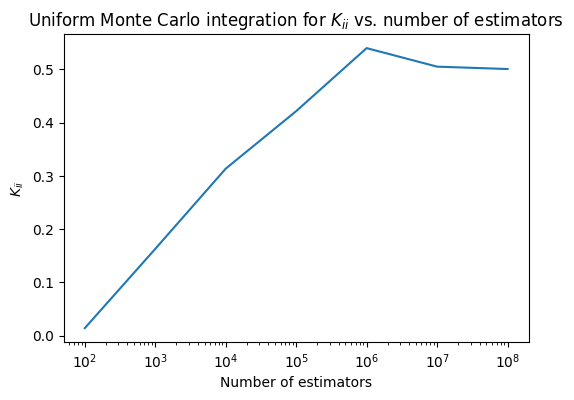

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.plot(ns, kii)
ax.set_xscale('log')
ax.set_xlabel("Number of estimators")
ax.set_ylabel("$K_{ii}$")
ax.set_title("Uniform Monte Carlo integration for $K_{ii}$ vs. number of estimators")
fig.savefig("uniform_mc_kii.png", dpi=210)

The integral converges very slowly. The estimations with $n<10^6$ are off by large. It seems to start to converge at $n\geq 10^7$, but even with that huge number of estimators, the result is still fluctuating a little. It converges to around 0.50.

# Diagonal kinetic energy matrix element with importance sampling

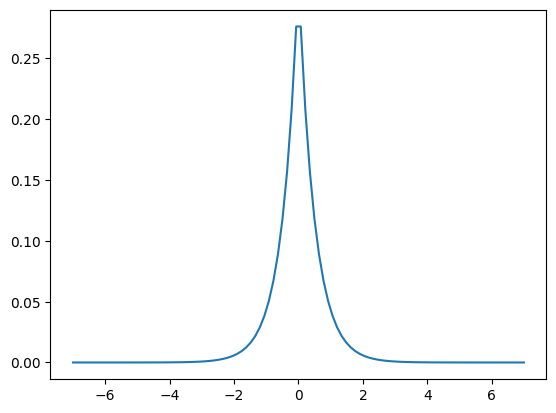

In [6]:
x = np.linspace(-7, 7, 100)
y = np.zeros(len(x))
z = np.zeros(len(x))
psis = psi_1s(x, y, z)**2
plt.plot(x, psis)

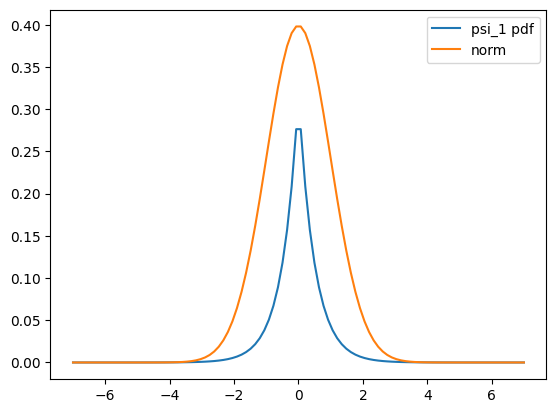

In [7]:
guas = stats.norm.pdf(x)
plt.plot(x, psis, label='psi_1 pdf')
plt.plot(x, guas, label='norm')
plt.legend()

Sampling from the Gaussian distribution

In [8]:
distribution = GaussianDistribution()
drawer = Drawer(distribution)
integrand = diagonalKIntegrand
mc = MonteCarlo(integrand, drawer)

In [9]:
ns = np.array([10**i for i in range(2, 9)])
kii_gaus = np.array([mc.integrate(n) for n in ns])

Monte Carlo on 100 estimators


0it [00:00, ?it/s]


Monte Carlo on 1000 estimators


0it [00:00, ?it/s]


Monte Carlo on 10000 estimators


0it [00:00, ?it/s]


Monte Carlo on 100000 estimators


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.25it/s]


Monte Carlo on 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.70it/s]


Monte Carlo on 10000000 estimators


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.13it/s]


Monte Carlo on 100000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.88it/s]


In [10]:
kii_gaus

array([0.76340127, 0.53075479, 0.51203263, 0.49687546, 0.49727747,
       0.49973535, 0.50022397])

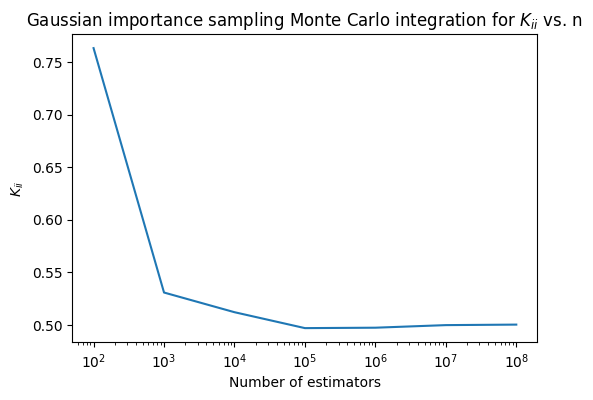

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.plot(ns, kii_gaus)
ax.set_xscale('log')
ax.set_xlabel("Number of estimators")
ax.set_ylabel("$K_{ii}$")
ax.set_title("Gaussian importance sampling Monte Carlo integration for $K_{ii}$ vs. n")
fig.savefig("gaussian_mc_kii.png", dpi=210)

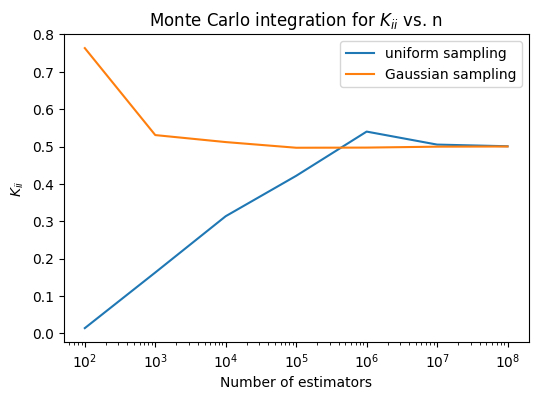

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.plot(ns, kii, label='uniform sampling')
ax.plot(ns, kii_gaus, label='Gaussian sampling')
ax.set_xscale('log')
ax.set_xlabel("Number of estimators")
ax.set_ylabel("$K_{ii}$")
ax.set_title("Monte Carlo integration for $K_{ii}$ vs. n")
ax.legend()
fig.savefig("comparison_mc_kii.png", dpi=210)

Importance sampling converges much faster than random sampling! It gets reasonably close to the actual value by $n=10^3$ and converges at $n\geq 10^5$. Both sampling methods converge to the same value of 0.50.

# Off-diagonal kinetic energy matrix element with random sampling

In [13]:
distribution = UniformDistribution()
drawer = Drawer(distribution)
integrand = offDiagonalKIntegrand()
mc = MonteCarlo(integrand, drawer)

In [14]:
ns = np.array([10**i for i in range(2, 9)])
kij = np.array([mc.integrate(n) for n in ns])

Monte Carlo on 100 estimators


0it [00:00, ?it/s]


Monte Carlo on 1000 estimators


0it [00:00, ?it/s]


Monte Carlo on 10000 estimators


0it [00:00, ?it/s]


Monte Carlo on 100000 estimators


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.54it/s]


Monte Carlo on 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 30.52it/s]


Monte Carlo on 10000000 estimators


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.40it/s]


Monte Carlo on 100000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 31.11it/s]


In [15]:
kij

array([0.01264788, 0.10905251, 0.16494435, 0.2168608 , 0.21979131,
       0.21436753, 0.21525914])

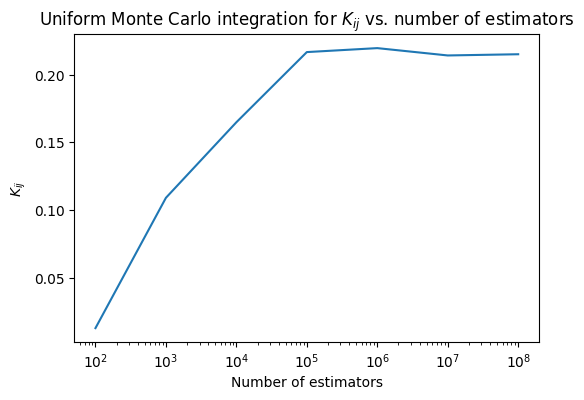

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.plot(ns, kij)
ax.set_xscale('log')
ax.set_xlabel("Number of estimators")
ax.set_ylabel("$K_{ij}$")
ax.set_title("Uniform Monte Carlo integration for $K_{ij}$ vs. number of estimators")
fig.savefig("uniform_mc_kij.png", dpi=210)

Similar to random sampling for the diagonal entries, the result converges very slowly. It comes close to the actual value with $n\geq 10^5$ but does not converge until $n\geq 10^7$. It converges to around 0.216.

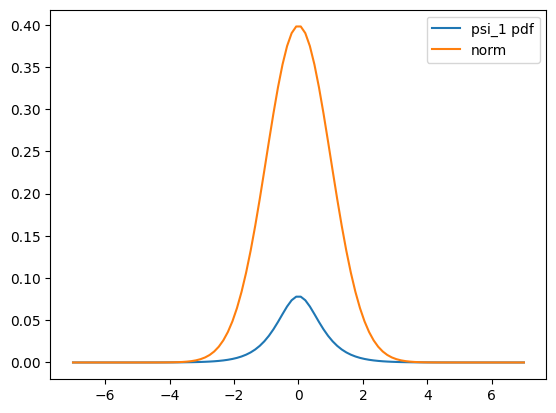

In [17]:
Rz = 1.4
x = np.linspace(-7, 7, 100)
y = np.zeros(len(x))
z = np.zeros(len(x))
psis = psi_1s(x, y, z+Rz/2)*psi_1s(x, y, z-Rz/2)
guas = stats.norm.pdf(x)
plt.plot(x, psis, label='psi_1 pdf')
plt.plot(x, guas, label='norm')
plt.legend()

The Gaussian distribution centered at 0 is still a good choice.

In [18]:
distribution = GaussianDistribution()
drawer = Drawer(distribution)
integrand = offDiagonalKIntegrand()
mc = MonteCarlo(integrand, drawer)

In [19]:
ns = np.array([10**i for i in range(2, 9)])
kij_gaus = np.array([mc.integrate(n) for n in ns])

Monte Carlo on 100 estimators


0it [00:00, ?it/s]


Monte Carlo on 1000 estimators


0it [00:00, ?it/s]


Monte Carlo on 10000 estimators


0it [00:00, ?it/s]


Monte Carlo on 100000 estimators


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.64it/s]


Monte Carlo on 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.37it/s]


Monte Carlo on 10000000 estimators


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.49it/s]


Monte Carlo on 100000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.22it/s]


In [20]:
kij_gaus

array([0.30411784, 0.21491053, 0.22973316, 0.21731126, 0.21644799,
       0.21552473, 0.21553433])

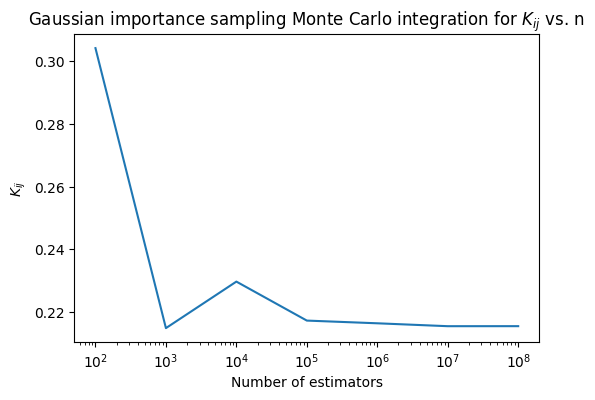

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.plot(ns, kij_gaus)
ax.set_xscale('log')
ax.set_xlabel("Number of estimators")
ax.set_ylabel("$K_{ij}$")
ax.set_title("Gaussian importance sampling Monte Carlo integration for $K_{ij}$ vs. n")
fig.savefig("gaussian_mc_kij.png", dpi=210)

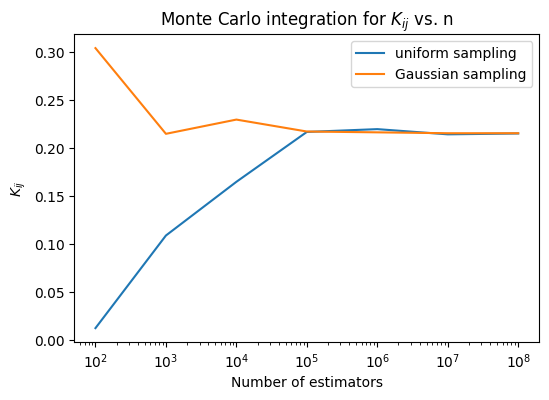

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.plot(ns, kij, label='uniform sampling')
ax.plot(ns, kij_gaus, label='Gaussian sampling')
ax.set_xscale('log')
ax.set_xlabel("Number of estimators")
ax.set_ylabel("$K_{ij}$")
ax.set_title("Monte Carlo integration for $K_{ij}$ vs. n")
ax.legend()
fig.savefig("comparison_mc_kij.png", dpi=210)

As with the diagonal entries, importance sampling converges must faster than random sampling. It comes close with $n=10^3$ and converges with $n\geq 10^5$. Both sampling methods converge to the same value of 0.216.